# Importing Data Visualization and Manipulation Libraries

In [97]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')


# Reading the data

In [125]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

df = pd.read_csv(
    r"C:\Users\ds12\College\Python-Assignments\Dataset\Amazon-Products.csv", index_col=0
)

df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


# Describe the dataset

In [126]:
df.describe()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,551585,551585,551585,551585,551585,375791,375791,490422,533772
unique,396210,20,112,462414,551585,49,8342,27511,23170
top,Zeya Yellow Gold Ring,accessories,Shirts,https://m.media-amazon.com/images/I/51uEPldT42...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.0,1,₹499,₹999
freq,718,116141,19200,3044,1,36609,39816,18248,48774


# Data Information

In [127]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 551585 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 42.1+ MB


In [128]:
# Checking for null values

df.isnull().sum().sort_values(ascending=False)


ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
name                   0
main_category          0
sub_category           0
image                  0
link                   0
dtype: int64

In [129]:
df["actual_price"] = df["actual_price"].str.strip("₹")
df["discount_price"] = df["discount_price"].str.strip("₹")
df["no_of_ratings"] = df["no_of_ratings"].str.replace(",", "")
df["ratings"] = df["ratings"].str.replace(",", "")
# Keeping the numeric values in the columns and replacing the rest with NaN

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"], errors="coerce")
df["actual_price"] = pd.to_numeric(df["actual_price"], errors="coerce")
df["discount_price"] = pd.to_numeric(df["discount_price"], errors="coerce")

In [130]:
# Replcaing the NaN values with the median of the column

df["ratings"].fillna(df["ratings"].median(), inplace=True)
df["no_of_ratings"].fillna(df["no_of_ratings"].median(), inplace=True)
df["actual_price"].fillna(df["actual_price"].median(), inplace=True)
df["discount_price"].fillna(df["discount_price"].median(), inplace=True)
df.drop(["image", "link"], axis=1, inplace=True)

In [131]:
df.isna().sum().sort_values(ascending=False)


name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [134]:
# Checking for duplicates and removing them

df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [137]:
df.head()


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,470.4,725.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,470.4,725.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,470.4,725.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,470.4,725.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,470.4,725.0


# EDA and Data Visualization

### Q1 Getting the name of products with ratings greater than 4.5 and have the highest number of ratings in each main category

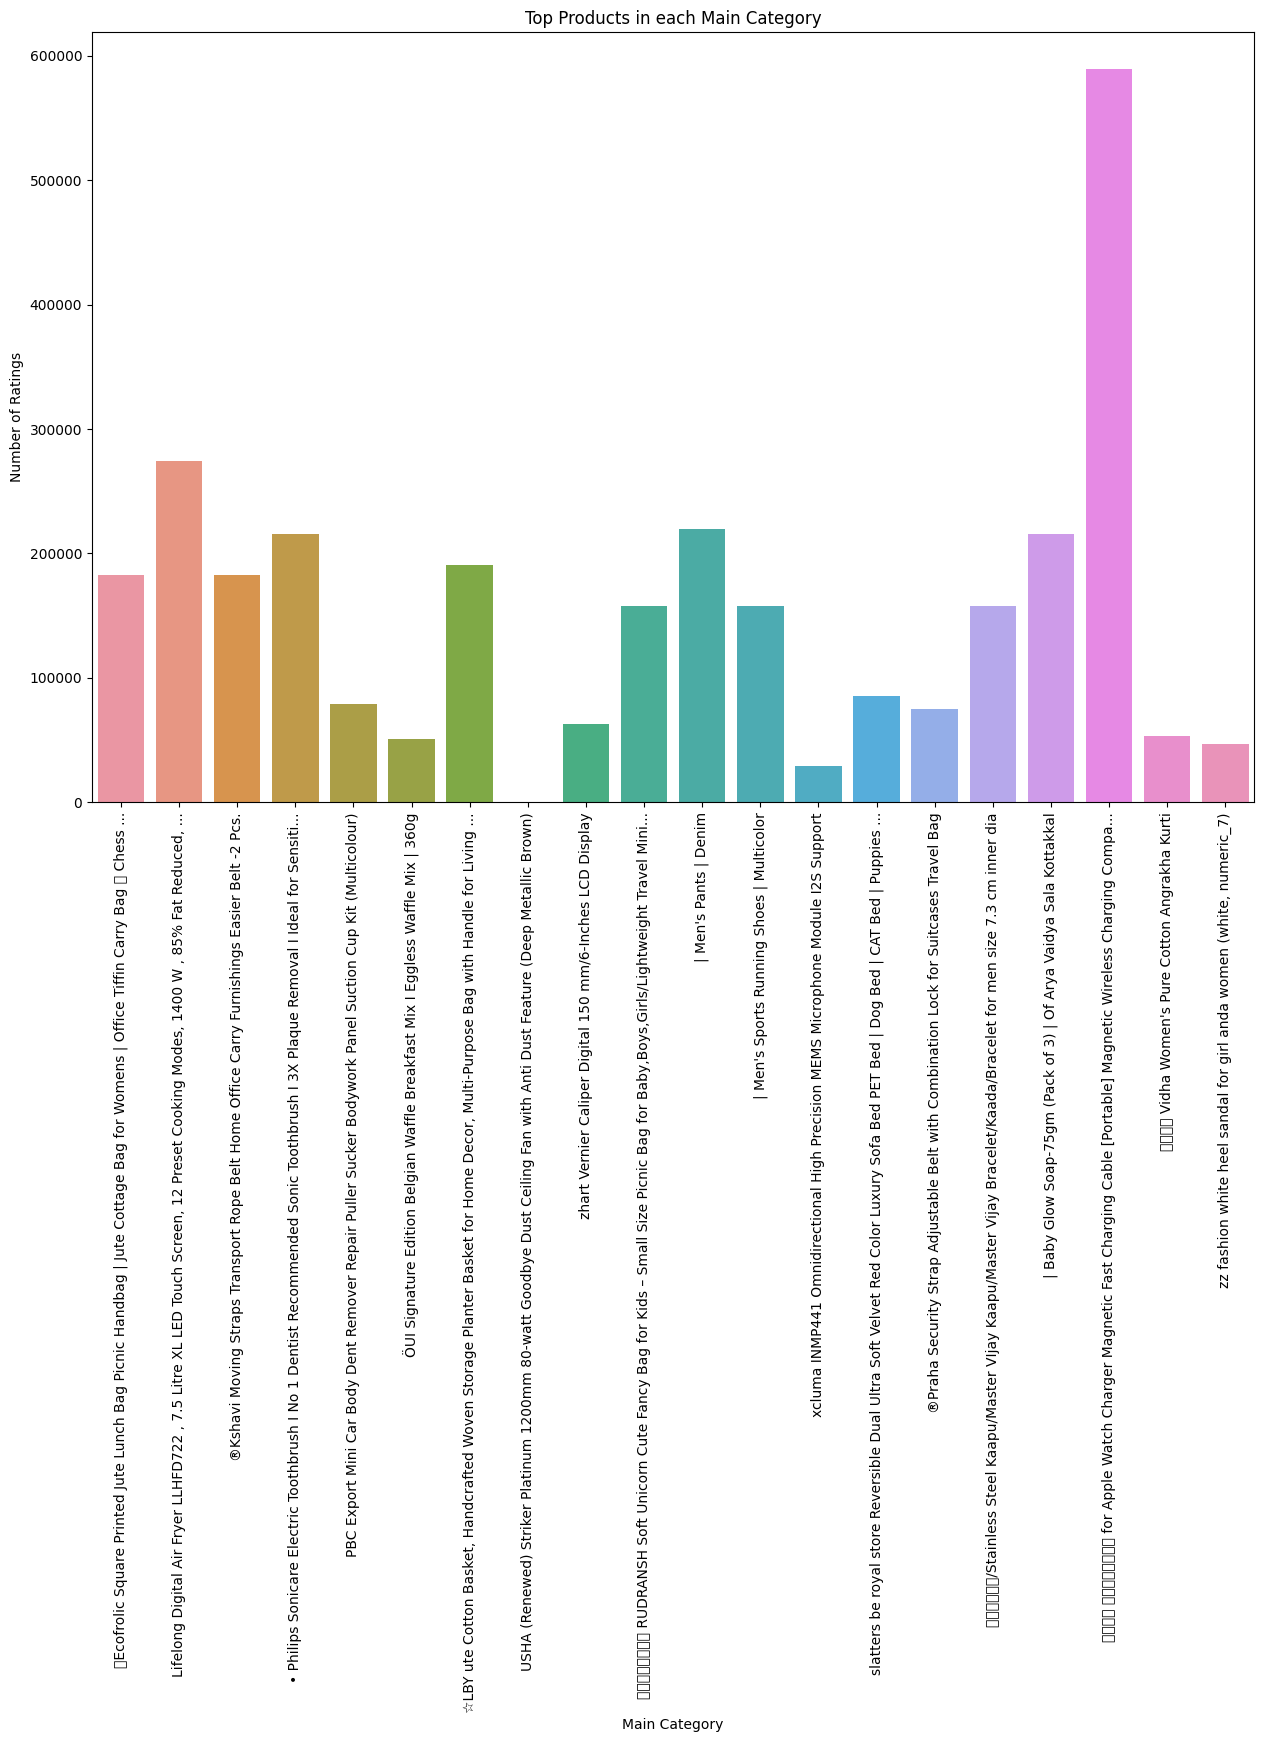

In [152]:
top_products_main_category = df.groupby(["main_category"])[
    "name", "no_of_ratings"
].max()
top_products_main_category

# Plottting the above data

plt.figure(figsize=(15, 10))
sns.barplot(y="no_of_ratings", x="name", data=top_products_main_category)
plt.xticks(rotation=90)
plt.title("Top Products in each Main Category")
plt.xlabel("Main Category")
plt.ylabel("Number of Ratings")
plt.show()

In [147]:
top_products_main_category


,name,no_of_ratings
main_category,,
accessories,🌿Ecofrolic Square Printed Jute Lunch Bag Picni...,182448.0
appliances,"﻿﻿Lifelong Digital Air Fryer LLHFD722 , 7.5 Li...",274505.0
bags & luggage,®Kshavi Moving Straps Transport Rope Belt Home...,182473.0
beauty & health,• Philips Sonicare Electric Toothbrush I No 1 ...,215913.0
car & motorbike,‎PBC Export Mini Car Body Dent Remover Repair ...,78970.0
grocery & gourmet foods,ÖUI Signature Edition Belgian Waffle Breakfast...,50629.0
home & kitchen,"☆LBY ute Cotton Basket, Handcrafted Woven Stor...",190982.0
"home, kitchen, pets",USHA (Renewed) Striker Platinum 1200mm 80-watt...,20.0
industrial supplies,zhart Vernier Caliper Digital 150 mm/6-Inches ...,62649.0
